# Introduction

In [45]:
%run "00_utils.ipynb"

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import gridspec


%matplotlib inline

### Datasets & Simulations
- Scklearn toy-datasets vs real world Vs `make_xxx` e.g. make_blob
- Create from equation
- Use distribution pdfs
- TODO: markov etc

In [12]:
from sklearn import datasets

In [17]:
dir(datasets.load_boston() )

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [22]:
# dset = datasets.load_boston()
# df = pd.DataFrame.from_records(dset.data)
# df.columns = dset.feature_names
# df

In [92]:
## 2D classification dataset - guassian distribution
# X, y = datasets.make_blobs()
# X, y = datasets.make_moons()
# X, y = datasets.make_circles()
# X, y = datasets.make_checkerboard()
# X, y = datasets.make_regression( n_features=1, noise=10)
# X = datasets.make_biclusters(n_clusters=4, shape=(100, 3) )
# X, y = datasets.make_classification()
# X, y = datasets.make_blobs()
# df = pd.DataFrame( dict(x1=X[:,0], x2=X[:,1], y=y) )
# df.y.value_counts()
# #sns.countplot(y);
# sns.scatterplot(x='x1', y='x2', hue='y', data=df) 
    

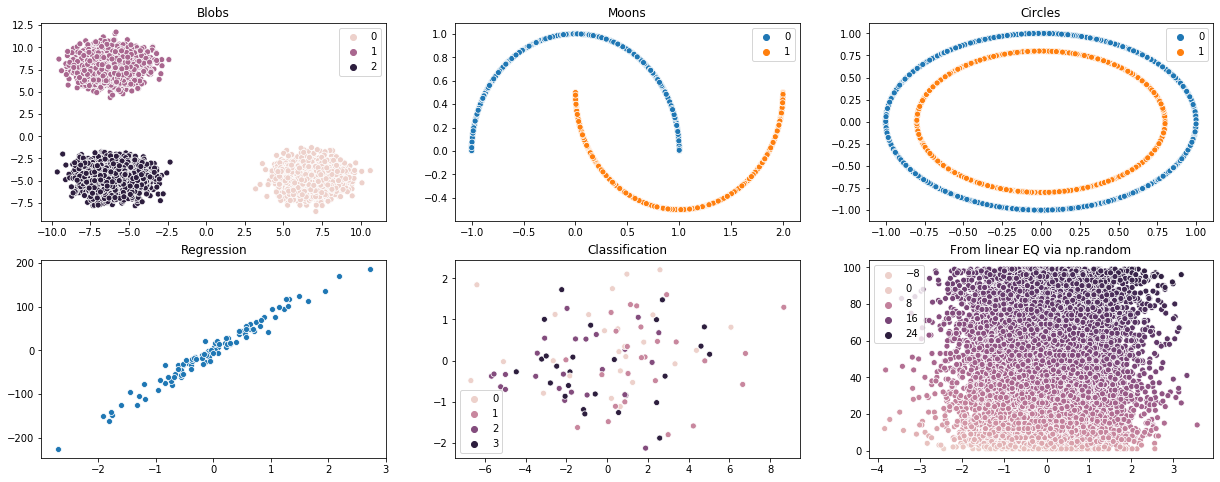

In [130]:
n = 6
n_c = 3
n_r = n//n_c if n % n_c == 0 else n//n_c + 1
plt.figure(figsize=(n_c*7, n_r*4))

binz=100
samp_n=10000
## 1. 
X, y = datasets.make_blobs(n_samples=samp_n, n_features=2)
plt.subplot(n_r, n_c, 1)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y )  
plt.title('Blobs')

## 2.  
X, y = datasets.make_moons(n_samples=samp_n )
plt.subplot(n_r, n_c, 2)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y )  
plt.title('Moons')

## 3.  
X, y = datasets.make_circles(n_samples=samp_n )
plt.subplot(n_r, n_c, 3)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y )  
plt.title('Circles')


## 4.  
X,y = datasets.make_regression( n_features=1, noise=10)
plt.subplot(n_r, n_c, 4)
sns.scatterplot(x=X[:,0], y=y )  
plt.title('Regression')

## 5.  
X, y = datasets.make_classification(n_informative=6,n_classes=4)
plt.subplot(n_r, n_c, 5)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y ) 
plt.title('Classification');


## 6.   from a linear eq using np
np.random.seed(9999)
x1 = np.random.randn( samp_n )
x2 = np.random.randint( 1, 100, samp_n )
y = x1 + 2*np.sqrt(x2) 
plt.subplot(n_r, n_c, 6)
sns.scatterplot(x=x1, y=x2, hue=y ) 
plt.title('From linear EQ via np.random');

### Probability Distributions

In [71]:
from scipy import stats
# or from np.random 

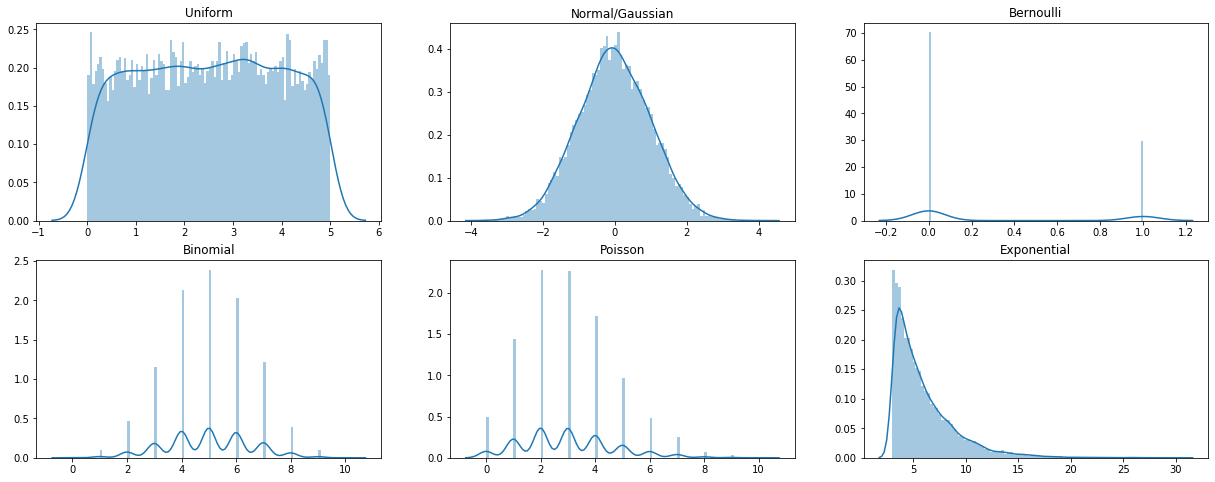

In [123]:
n = 6
n_c = 3
n_r = n//n_c if n % n_c == 0 else n//n_c + 1
plt.figure(figsize=(n_c*7, n_r*4))

binz=100
samp_n=10000
## 1. uniform a=0, b=5 
d = stats.uniform.rvs(size=samp_n, loc=0, scale=5)
plt.subplot(n_r, n_c, 1)
sns.distplot( d, bins=binz  ); 
plt.title('Uniform')

## 2. standard normal N(0,1)
d = stats.norm.rvs(size=samp_n, loc=0, scale=1)
plt.subplot(n_r, n_c, 2)
sns.distplot( d, bins=binz  ); 
plt.title('Normal/Gaussian')

## 3. bernoulli p=0.3
d = stats.bernoulli.rvs(size=samp_n, p=0.3)
plt.subplot(n_r, n_c, 3)
sns.distplot( d, bins=binz  ); 
plt.title('Bernoulli')


## 4. binomial p=0.5, n=10
d = stats.binom.rvs(size=samp_n, p=0.5, n=10)
plt.subplot(n_r, n_c, 4)
sns.distplot( d, bins=binz  ); 
plt.title('Binomial')

## 5. poisson mu=3
d = stats.poisson.rvs(size=samp_n, mu=3)
plt.subplot(n_r, n_c, 5)
sns.distplot( d, bins=binz  );
plt.title('Poisson')

## 6. exponential, 1/lambda=3
d = stats.expon.rvs(size=samp_n, loc=3, scale=3)
plt.subplot(n_r, n_c, 6)
sns.distplot( d, bins=binz  );
plt.title('Exponential');


### Preprocessing & Transformers

In [13]:
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.linear_model import LinearRegression


In [19]:
features_col = ['CRIM','Age', 'INDUS']
target_col = 'RAD'

[array([ 4, 25]), array([ 5, 36])]


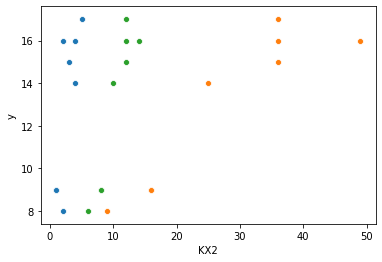

In [228]:
df = pd.DataFrame( columns=['X1', 'X2', 'y'], data=[
    [1, 16, 9],
    [4, 36, 16],
    [1, 16, 9],
    [2, 9, 8],
    [3, 36, 15],
    [2, 49, 16],
    [4, 25, 14],
    [5, 36, 17],
])# y = X1 + 2*sqrt(X2)

## do kern on x2 to make linear b/c we already know the relationship
df['KX2'] = 2 * np.sqrt( df.X2 )
df['y2'] = df.y **2


train = df.iloc[:6]
test = df.iloc[6:]

trainer = list(train[['X1', 'X2']].values)
tester = list( test[['X1','X2']].values )

print(tester)

sns.scatterplot(x=df.X1, y=df.y)
sns.scatterplot(x=df.X2, y=df.y)
sns.scatterplot(x=df.KX2, y=df.y);
# sns.scatterplot(x=df.X1, y=df.KX2); 

In [229]:
class KnownKernTransform(BaseEstimator, TransformerMixin):
    def __init__(self, feature_index):
        self.feature_index=feature_index
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X_ = X.copy()
        X_[self.feature_index] = 2 * np.sqrt( X_[self.feature_index] )
        return X_

    
print("-- 1. bila transform ")
pipe1 = Pipeline([    
    ('linear', LinearRegression() ),
])
_ = pipe1.fit( trainer, list(train.y) )
pipe1.predict( tester)

print("\n-- 2. with transform ")
pipe2 = Pipeline([    
    ('kernit', KnownKernTransform(1)), 
    ('linear', LinearRegression() ),
])
_ = pipe2.fit( trainer, list(train.y) )
pipe2.predict( tester )

print( "\n--- inputs: ", tester )
test[['y','y2']]

-- 1. bila transform 


array([13.72113586, 16.93334467])


-- 2. with transform 


array([16.77973209, 15.98100754])


--- inputs:  [array([ 4, 25]), array([ 5, 36])]


,y,y2
6,14,196
7,17,289


In [232]:
## Transforming Targets >>> TransformedTargetRegressor 
## 2. class approach 
class KnownYTransform(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, target):
        return self
    
    def transform(self,target):
        targ_ = target.copy()
        targ_ = np.sqrt(targ_)
        return targ_
    
    def inverse_transform(self, target):
        targ_ = target.copy()
        targ_ = targ_**2
        return targ_
    
## 1. function method 
def target_y_transform(target):
    targ_ = target.copy()
    targ_ = np.sqrt(targ_)
    return targ_

def inverse_target_y_transform(target):
    targ_ = target.copy()
    targ_ = targ_**2
    return targ_

print("-- 1. bila transform on y2")
_ = pipe2.fit( trainer, list(train.y2) )
p = pipe2.predict( tester )
p
np.sqrt(p)

print("\n-- 2. with function transform on y2") 
model = TransformedTargetRegressor(regressor=pipe2,
                                  func=target_y_transform,
                                  inverse_func=inverse_target_y_transform,
                                  check_inverse=False)
_ = model.fit( trainer , list(train.y2) )
p = model.predict( tester )
p
np.sqrt(p)


print("\n-- 3. with class transform on y2")
model = TransformedTargetRegressor(regressor=pipe2,
                                   transformer=KnownYTransform(),
                                  check_inverse=False)
_ = model.fit( trainer, list(train.y2) )
p = model.predict( tester )
p
np.sqrt(p)



print( "\n--- inputs: ", tester )
test[['y','y2']]

-- 1. bila transform on y2


array([274.03028538, 255.59362762])

array([16.55386014, 15.98729582])


-- 2. with function transform on y2


array([281.55940904, 255.39260184])

array([16.77973209, 15.98100754])


-- 3. with class transform on y2


array([281.55940904, 255.39260184])

array([16.77973209, 15.98100754])


--- inputs:  [array([ 4, 25]), array([ 5, 36])]


,y,y2
6,14,196
7,17,289


In [233]:
model.get_params()

{'check_inverse': False,
 'func': None,
 'inverse_func': None,
 'regressor__memory': None,
 'regressor__steps': [('kernit', KnownKernTransform(feature_index=1)),
  ('linear',
   LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False))],
 'regressor__verbose': False,
 'regressor__kernit': KnownKernTransform(feature_index=1),
 'regressor__linear': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 'regressor__kernit__feature_index': 1,
 'regressor__linear__copy_X': True,
 'regressor__linear__fit_intercept': True,
 'regressor__linear__n_jobs': None,
 'regressor__linear__normalize': False,
 'regressor': Pipeline(memory=None,
          steps=[('kernit', KnownKernTransform(feature_index=1)),
                 ('linear',
                  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                   normalize=False))],
          verbose=False),
 'transformer': KnownYTransform()}

## Bringing it home

In [253]:
dset = datasets.load_diabetes() 
# df_can = pd.DataFrame.from_records( np.hstack((dset.data, dset.target) ) )
df_can = pd.DataFrame.from_records( dset.data )
df_can.columns = list(dset.feature_names)
df_can['y'] = dset.target
df_can
                                

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [254]:
dir(dset)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']